# ROAD TRAFFIC

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
def bar_plot_column(df, name):
    plt.figure(figsize = (8,10))
    sns.countplot(y=name, data=df, order=df[name].value_counts().index)
    plt.title('Count of ' + name)
    plt.ylabel(name)
    plt.xlabel('Count')
    plt.show()

In [2]:
df = pd.read_csv('data/Traffic_Volume_Counts__2014-2019_clean.csv')
print('Dataset Shape: ', df.shape)
df.head(5)

Dataset Shape:  (27285, 34)


,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Year,Month,Weekday
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,2014-09-13,204.0,177.0,133.0,...,546,582,528,432,328,282,240,2014,9,Saturday
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,2014-09-13,140.0,51.0,128.0,...,362,418,335,282,247,237,191,2014,9,Saturday
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,2014-09-13,94.0,73.0,65.0,...,236,213,190,199,183,147,103,2014,9,Saturday
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,2014-09-13,88.0,82.0,75.0,...,240,217,198,186,162,157,103,2014,9,Saturday
4,62,147673,Broadway,West 242 Street,240 Street,SB,2014-09-13,255.0,209.0,149.0,...,675,641,556,546,465,425,324,2014,9,Saturday


No handles with labels found to put in legend.


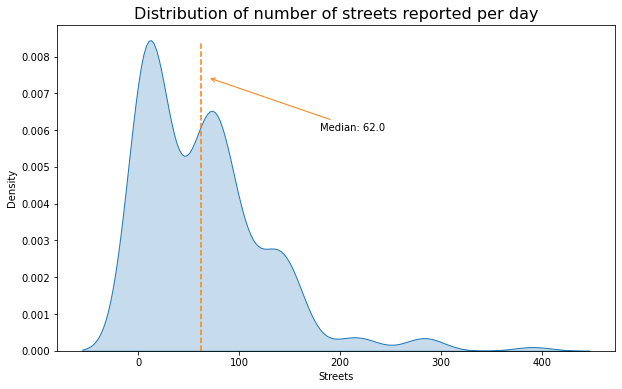

In [4]:
col = sns.color_palette()

plt.figure(figsize=(10, 6))
data = df.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=data, shade=True)
plt.axvline(x=data.median(), ymax=0.95, linestyle='--', color=col[1])
plt.annotate(
    'Median: ' + str(data.median()),
    xy=(data.median(), 0.0075),
    xytext=(180, 0.006),
    arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))
plt.title('Distribution of number of streets reported per day', fontdict={'fontsize': 16})
plt.xlabel('Streets')
plt.ylabel('Density')
plt.legend().remove()
plt.show()

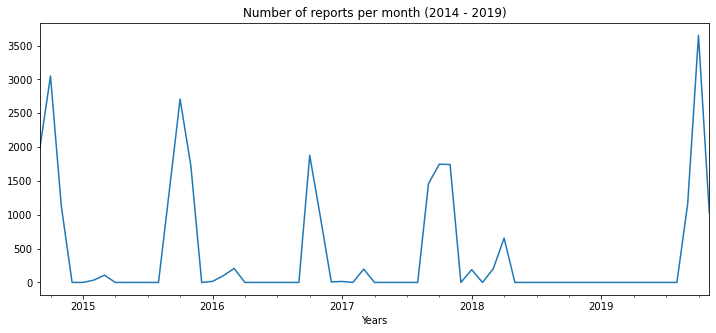

In [4]:
df.index = pd.DatetimeIndex(df.Date)
plt.figure(figsize=(12,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of reports per month (2014 - 2019)')
plt.xlabel('Years')
plt.show()

/home/djordje/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


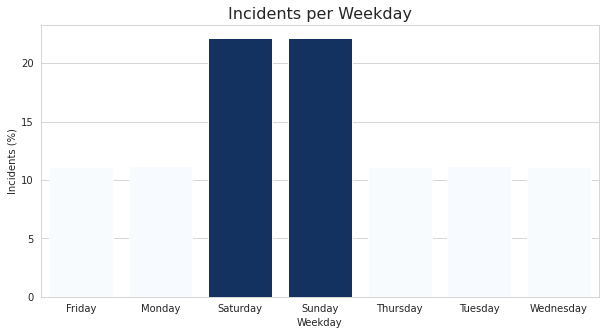

In [6]:
from matplotlib import cm

data = df.groupby('Weekday').count().iloc[:, 0]
plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Blues').to_rgba(data.values))

plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.ylabel('Incidents (%)')

plt.show()

# WEATHER

In [55]:
df_weather = pd.read_csv('data/weather.csv')
print('Dataset Shape: ', df_weather.shape)
df_weather.head(5)

Dataset Shape:  (52523, 13)


,Datetime,Temperature,FeelsLike,Dew,Humidity,Wind,WindSpeed,WindGust,Pressure,Precip.,Condition,Day/Night,Clouds
0,2014-01-01 00:00,27,16.0,6.0,41,WNW,14.0,24.0,30.26,NaN,Fair,N,CLR
1,2014-01-01 01:00,26,13.0,4.0,39,W,17.0,28.0,30.27,NaN,Fair,N,CLR
2,2014-01-01 02:00,25,13.0,6.0,45,WNW,15.0,22.0,30.29,NaN,Fair,N,CLR
3,2014-01-01 03:00,25,13.0,6.0,45,W,15.0,21.0,30.32,NaN,Fair,N,CLR
4,2014-01-01 04:00,25,14.0,6.0,45,W,13.0,NaN,30.33,NaN,Fair,N,CLR


In [69]:
df_weather['Datetime'] = pd.to_datetime(df_weather['Datetime'])

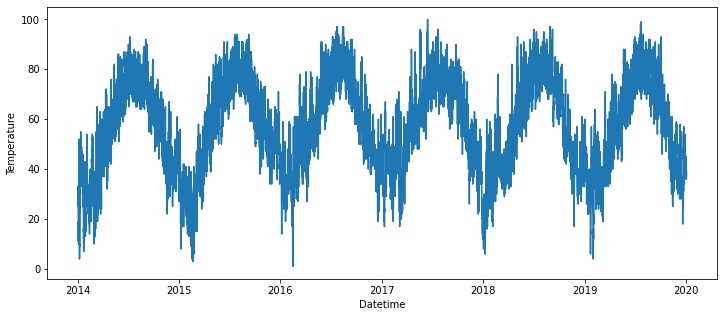

In [71]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Datetime', y='Temperature', data=df_weather)
plt.show()

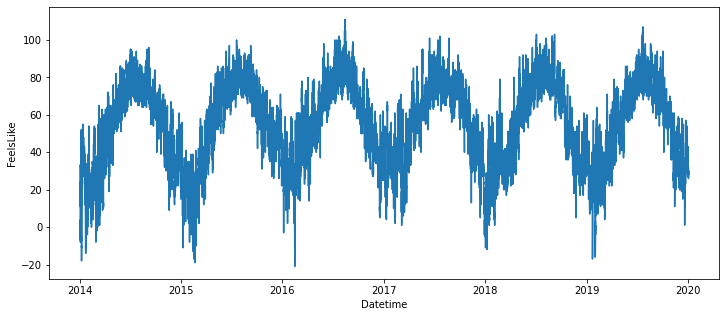

In [72]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Datetime', y='FeelsLike', data=df_weather)
plt.show()

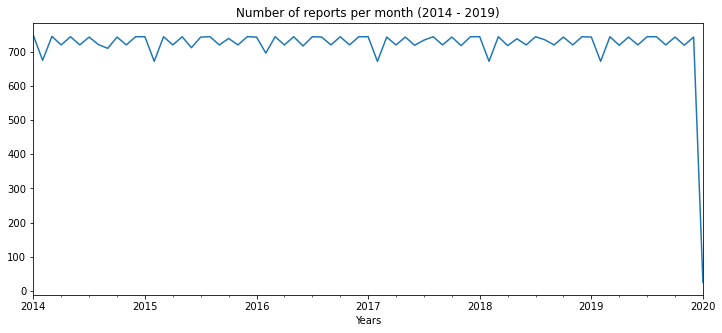

In [56]:
df_weather.index = pd.DatetimeIndex(df_weather.Datetime)
plt.figure(figsize=(12,5))
df_weather.resample('M').size().plot(legend=False)
plt.title('Number of reports per month (2014 - 2019)')
plt.xlabel('Years')
plt.show()

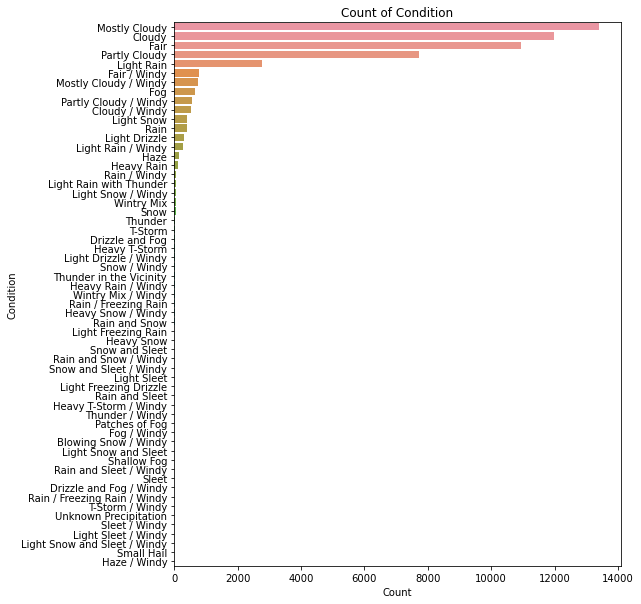

In [59]:
bar_plot_column(df_weather, 'Condition')

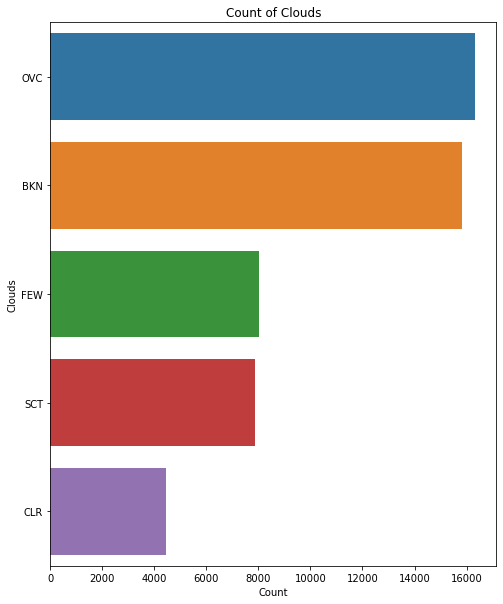

In [60]:
bar_plot_column(df_weather, 'Clouds')

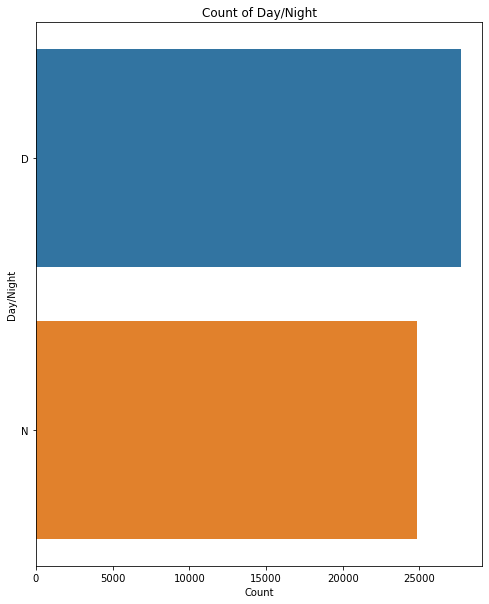

In [61]:
bar_plot_column(df_weather, 'Day/Night')

# ROAD DESC

In [41]:
df = pd.read_csv('data/LION_clean.csv')
print('Dataset Shape: ', df.shape)
df.head(5)

Dataset Shape:  (167958, 11)


,Street,NonPed,StreetWidth_Min,POSTED_SPEED,Snow_Priority,Number_Travel_Lanes,Number_Park_Lanes,Number_Total_Lanes,TRUCK_ROUTE_TYPE,Lon,Lat
0,EAST 168 STREET,NaN,34.0,25,S,2,2,4,NaN,-73.902925,40.830000
1,WEST 192 STREET,NaN,30.0,25,S,1,2,3,NaN,-73.901637,40.866807
2,UNION AVENUE,NaN,34.0,25,S,1,2,3,NaN,-73.900840,40.825199
3,UNION AVENUE,NaN,34.0,25,S,1,2,3,NaN,-73.900840,40.825199
4,UNION AVENUE,NaN,34.0,25,S,1,2,3,NaN,-73.900840,40.825199


In [42]:
nyc_map = plt.imread('data/NYC.png')

In [43]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    plt.figure(figsize=(16,10))
    plt.scatter(df.Lon, df.Lat, zorder=1, alpha=alpha, c='r', s=s)
    plt.xlim((BB[0], BB[1]))
    plt.ylim((BB[2], BB[3]))
    plt.imshow(nyc_map, zorder=0, extent=BB)

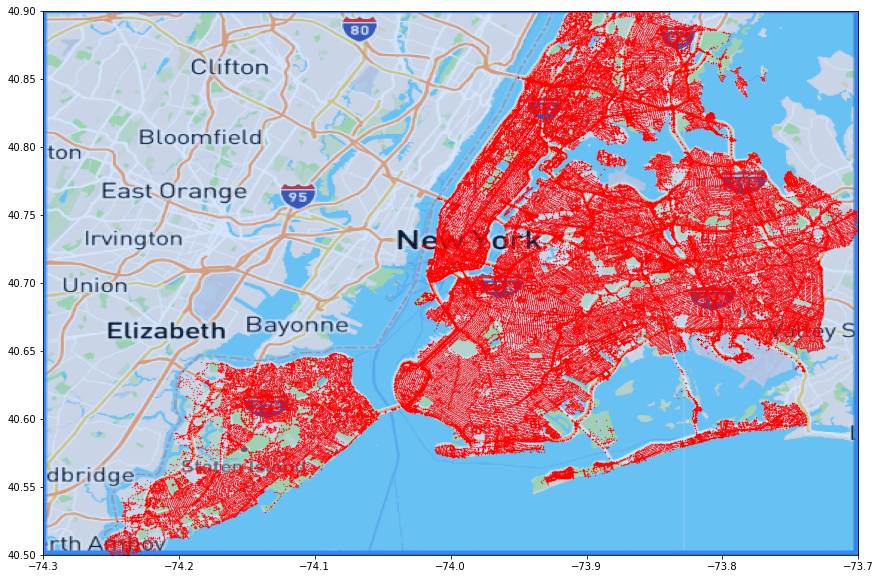

In [44]:
plot_on_map(df, [-74.3,-73.7, 40.5, 40.9], nyc_map, s=0.15, alpha=0.8)

In [45]:
def bar_plot_column(df, name):
    plt.figure(figsize = (8,10))
    sns.countplot(y=name, data=df, order=df[name].value_counts().index)
    plt.title('Count of ' + name)
    plt.ylabel(name)
    plt.xlabel('Count')
    plt.show()

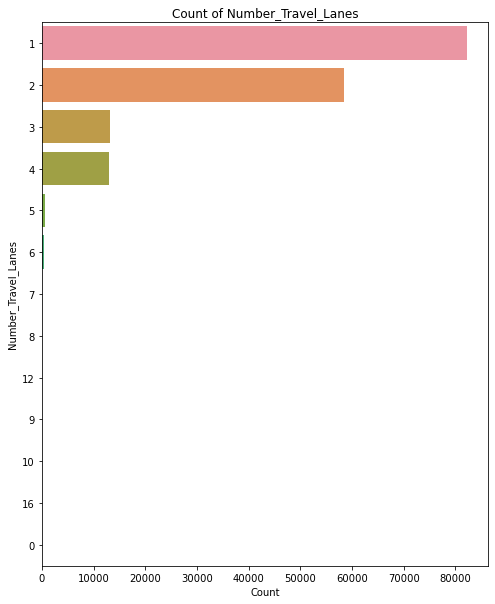

In [46]:
bar_plot_column('Number_Travel_Lanes')

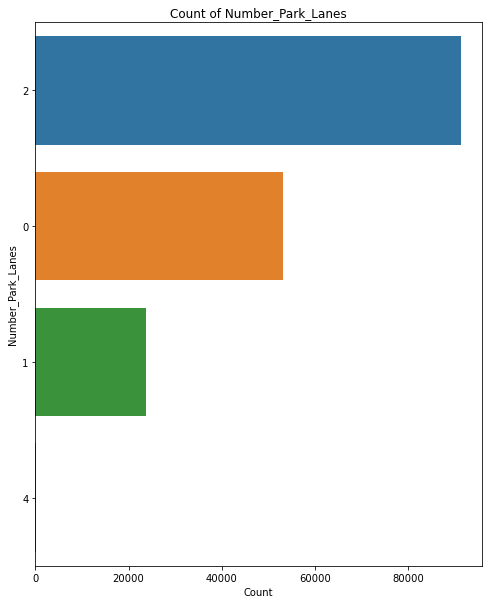

In [47]:
bar_plot_column('Number_Park_Lanes')

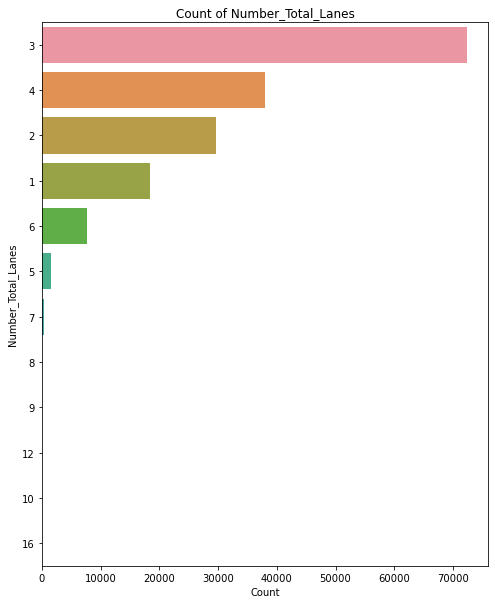

In [48]:
bar_plot_column('Number_Total_Lanes')

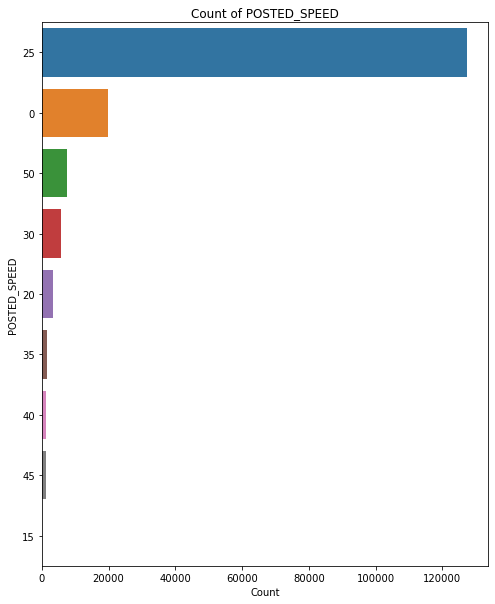

In [49]:
bar_plot_column('POSTED_SPEED')

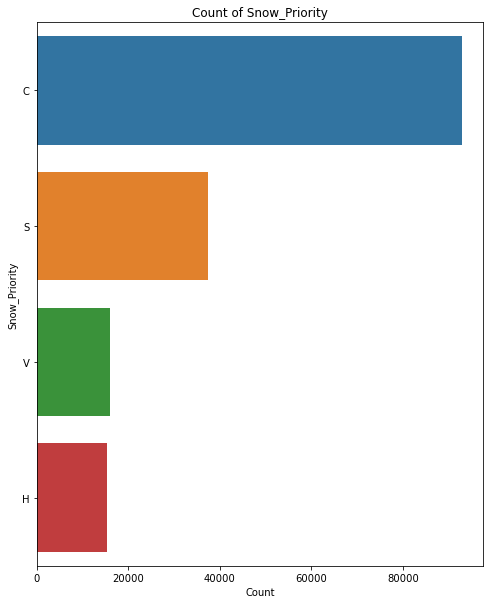

In [50]:
bar_plot_column('Snow_Priority')

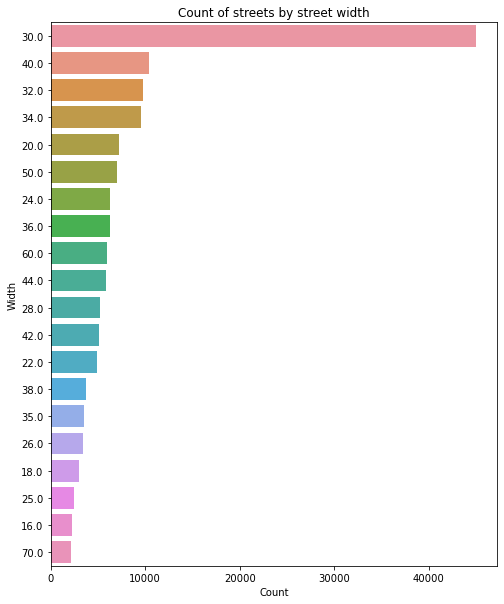

In [52]:
plt.figure(figsize = (8,10))
sns.countplot(y= 'StreetWidth_Min', data = df, order = df['StreetWidth_Min'].value_counts().iloc[:20].index)
plt.title('Count of streets by street width')
plt.ylabel('Width')
plt.xlabel('Count')
plt.show()